# Блок №6 Дополнительный проект

В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff файлом, который описывает геном мухи (описание формата можно найти здесь). При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий.

# Задачи
1. Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x
2. Выясните, какое из этих значений является самым частым
3. Постройте распределение встречаемости значений в столбце type

Данные можно достать либо с JupyterHub, либо [отсюда](https://stepik.org/media/attachments/course/72204/gff.tsv)

# Задание 1
___
Какое значение атрибута Parent самое частое?

In [2]:
import pandas as pd
import re

In [3]:
# Считаем данные, в данном формате разделителем является табуляция
df = pd.read_csv('/home/jupyter-a.stamati-16/Lectures_6/gff.tsv', sep='\t')
df.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [4]:
# Отберем значения атрибута Parent, с помощью регулярных выражений
parent = df.attributes.str.extract(r'Parent=(?P<parent>[\w\.]+)')

In [5]:
parent.parent.value_counts()

XM_001475631.1    479
NC_000083.5        33
Name: parent, dtype: int64

In [7]:
# Найдем самое частое хначение атрибута Parent
parent.parent.value_counts().idxmax()

'XM_001475631.1'

# Задание 2
___
Какое самое частое значение в колонке type?

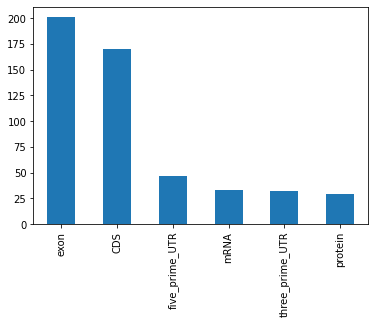

In [10]:
# Визуализируем данные
df['type'].value_counts().plot(kind='bar');

Ответ:
```
exon
```